In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_table(r'C:\Users\Gateway\Desktop\projects_raw.tsv')
df.head()

,id,name,blurb,goal,pledged,country,deadline,created_at,launched_at,backers_count,fx_rate,category,main_category,state
0,1295155228,RMo Studio Needs Your Help,Help RMo Studio to buy a new kiln for ceramics...,2500.0,5504.0,GB,1610128800,1606933477,1607299280,152,1.36147,Ceramics,Art,live
1,39027197,"Animals on Ceramics, Hand Drawn and Handmade, ...",Custom Hand Drawn Animals on Handmade Ceramic ...,120.0,38.0,US,1612504740,1607541996,1609434617,3,1.00000,Ceramics,Art,live
2,274865,Pots On Wheels,We're creating a mobile outreach gallery of be...,20000.0,25732.0,US,1417496340,1409351310,1415110797,278,1.00000,Ceramics,Art,successful
3,112491653,Sarah Kersten Handmade Studio,Help build a studio space for Sarah Kersten Ha...,30000.0,35083.0,US,1413573982,1406328440,1410981982,233,1.00000,Ceramics,Art,successful
4,330304757,The Potter and the RAM,"I make sturdy, high-fired porcelain tableware ...",16000.0,22314.5,US,1383424322,1375916344,1380832322,273,1.00000,Ceramics,Art,successful


In [3]:
df.isna().describe()

,id,name,blurb,goal,pledged,country,deadline,created_at,launched_at,backers_count,fx_rate,category,main_category,state
count,79922,79922,79922,79922,79922,79922,79922,79922,79922,79922,79922,79922,79922,79922
unique,1,1,2,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,79922,79922,79919,79922,79922,79922,79922,79922,79922,79922,79922,79922,79922,79922


In [4]:
df_interpolate=df.interpolate()
df_interpolate["blurb"].fillna( method ='ffill', inplace = True)
df_interpolate["country"].fillna( method ='ffill', inplace = True) 
df_interpolate["category"].fillna( method ='ffill', inplace = True)
df_interpolate["main_category"].fillna( method ='ffill', inplace = True)
df_interpolate["state"].fillna( method ='ffill', inplace = True)
df_interpolate.head(5)

,id,name,blurb,goal,pledged,country,deadline,created_at,launched_at,backers_count,fx_rate,category,main_category,state
0,1295155228,RMo Studio Needs Your Help,Help RMo Studio to buy a new kiln for ceramics...,2500.0,5504.0,GB,1610128800,1606933477,1607299280,152,1.36147,Ceramics,Art,live
1,39027197,"Animals on Ceramics, Hand Drawn and Handmade, ...",Custom Hand Drawn Animals on Handmade Ceramic ...,120.0,38.0,US,1612504740,1607541996,1609434617,3,1.00000,Ceramics,Art,live
2,274865,Pots On Wheels,We're creating a mobile outreach gallery of be...,20000.0,25732.0,US,1417496340,1409351310,1415110797,278,1.00000,Ceramics,Art,successful
3,112491653,Sarah Kersten Handmade Studio,Help build a studio space for Sarah Kersten Ha...,30000.0,35083.0,US,1413573982,1406328440,1410981982,233,1.00000,Ceramics,Art,successful
4,330304757,The Potter and the RAM,"I make sturdy, high-fired porcelain tableware ...",16000.0,22314.5,US,1383424322,1375916344,1380832322,273,1.00000,Ceramics,Art,successful


In [5]:
df_interpolate.shape
df_interpolate.nunique()

id               79919
name             79803
blurb            79415
goal              3360
pledged          30554
country             25
deadline         76825
created_at       79898
launched_at      79893
backers_count     2923
fx_rate             36
category           146
main_category       15
state                4
dtype: int64

In [6]:
df_interpolate.duplicated().sum()

3

In [7]:
# df_interpolate.dtypes
df.dtypes

id                 int64
name              object
blurb             object
goal             float64
pledged          float64
country           object
deadline           int64
created_at         int64
launched_at        int64
backers_count      int64
fx_rate          float64
category          object
main_category     object
state             object
dtype: object

In [8]:
pd.to_numeric(df_interpolate['goal'], errors='coerce')

0           2500.0
1            120.0
2          20000.0
3          30000.0
4          16000.0
           ...    
79917     125000.0
79918     800000.0
79919    1500000.0
79920      25000.0
79921     100000.0
Name: goal, Length: 79922, dtype: float64

In [9]:
pd.to_numeric(df_interpolate['pledged'], errors='coerce')

0         5504.0
1           38.0
2        25732.0
3        35083.0
4        22314.5
          ...   
79917    85192.0
79918       26.0
79919        0.0
79920     1040.0
79921        0.0
Name: pledged, Length: 79922, dtype: float64

In [10]:
pd.to_numeric(df_interpolate['deadline'], errors='coerce')

0        1610128800
1        1612504740
2        1417496340
3        1413573982
4        1383424322
            ...    
79917    1468108198
79918    1422902601
79919    1452142672
79920    1459121162
79921    1425242029
Name: deadline, Length: 79922, dtype: int64

In [11]:
pd.to_numeric(df_interpolate['created_at'], errors='coerce')

0        1606933477
1        1607541996
2        1409351310
3        1406328440
4        1375916344
            ...    
79917    1465400263
79918    1417153962
79919    1449537429
79920    1456328338
79921    1422634572
Name: created_at, Length: 79922, dtype: int64

In [12]:
pd.to_numeric(df_interpolate['launched_at'], errors='coerce')

0        1607299280
1        1609434617
2        1415110797
3        1410981982
4        1380832322
            ...    
79917    1465516198
79918    1417718601
79919    1449550672
79920    1456532762
79921    1422650029
Name: launched_at, Length: 79922, dtype: int64

In [13]:
pd.to_numeric(df_interpolate['backers_count'], errors='coerce')

0        152
1          3
2        278
3        233
4        273
        ... 
79917    348
79918      4
79919      0
79920     17
79921      0
Name: backers_count, Length: 79922, dtype: int64

In [14]:
pd.to_numeric(df_interpolate['fx_rate'], errors='coerce')

0        1.36147
1        1.00000
2        1.00000
3        1.00000
4        1.00000
          ...   
79917    1.00000
79918    1.00000
79919    1.00000
79920    1.00000
79921    1.00000
Name: fx_rate, Length: 79922, dtype: float64

Text(0, 0.5, 'Project_Count')

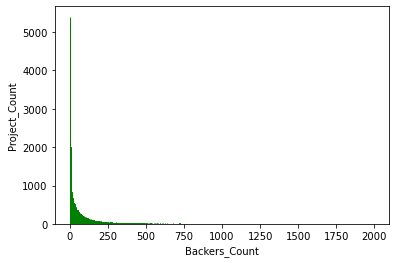

In [15]:
df_interpolate['backers_count'].plot.hist(bins=range(0, 2000, 1), edgecolor='green')
plt.xlabel('Backers_Count') 
plt.ylabel('Project_Count')

In [16]:
df = df_interpolate.select_dtypes(exclude='object')
def missing_ratio(s):
    return s.isna().mean() * 100
def median(df):
    return df.quantile(0.5)
def lower_quartile(df):
    return df.quantile(0.25)
def upper_quartile(df):
    return df.quantile(0.75)
df.agg([missing_ratio, min, lower_quartile, median, upper_quartile, max])

,id,goal,pledged,deadline,created_at,launched_at,backers_count,fx_rate
missing_ratio,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000
min,2.110900e+04,1.000000e-02,0.0,1.241334e+09,1.240366e+09,1.240603e+09,0.0,0.009685
lower_quartile,5.417078e+08,2.000000e+03,177.0,1.418073e+09,1.411259e+09,1.415226e+09,5.0,1.000000
median,1.078284e+09,5.000000e+03,2201.0,1.465547e+09,1.458753e+09,1.462693e+09,34.0,1.000000
upper_quartile,1.610210e+09,1.500000e+04,9771.0,1.534514e+09,1.527534e+09,1.531755e+09,113.0,1.000000
max,2.147460e+09,1.000000e+08,481621841.0,1.614662e+09,1.609464e+09,1.609484e+09,219382.0,1.807958


In [17]:
df=df_interpolate.select_dtypes(include='object')
def value_counts(col):
    return dict(col.value_counts())
df= df.agg([missing_ratio, pd.Series.nunique, value_counts])
df

,name,blurb,country,category,main_category,state
missing_ratio,0,0,0,0,0,0
nunique,79803,79415,25,146,15,4
value_counts,"{'A Midsummer Night's Dream': 5, 'Romeo & Juli...","{'Mind, Body, Spirit Fitness hands-on seminar ...","{'US': 55128, 'GB': 9233, 'CA': 3661, 'AU': 18...","{'Web': 3154, 'Apps': 1656, 'Gadgets': 1512, '...","{'Technology': 13297, 'Music': 11040, 'Film & ...","{'successful': 47570, 'failed': 27262, 'cancel..."


In [18]:
bins = df_interpolate['backers_count'].quantile([0, 0.25, 0.5, 0.75, 1])
bins

0.00         0.0
0.25         5.0
0.50        34.0
0.75       113.0
1.00    219382.0
Name: backers_count, dtype: float64

In [19]:
backers_rank = pd.cut(df_interpolate['backers_count'], bins, right=False)
backers_rank

0        [113.0, 219382.0)
1               [0.0, 5.0)
2        [113.0, 219382.0)
3        [113.0, 219382.0)
4        [113.0, 219382.0)
               ...        
79917    [113.0, 219382.0)
79918           [0.0, 5.0)
79919           [0.0, 5.0)
79920          [5.0, 34.0)
79921           [0.0, 5.0)
Name: backers_count, Length: 79922, dtype: category
Categories (4, interval[float64]): [[0.0, 5.0) < [5.0, 34.0) < [34.0, 113.0) < [113.0, 219382.0)]

In [20]:
bins = df_interpolate['backers_count'].quantile([0, 0.25, 0.5, 0.75, 1])
bins.iloc[-1] += 0.05
bins

0.00         0.00
0.25         5.00
0.50        34.00
0.75       113.00
1.00    219382.05
Name: backers_count, dtype: float64

In [21]:
df_interpolate = df_interpolate.assign(BackersRank=backers_rank)
df_interpolate

,id,name,blurb,goal,pledged,country,deadline,created_at,launched_at,backers_count,fx_rate,category,main_category,state,BackersRank
0,1295155228,RMo Studio Needs Your Help,Help RMo Studio to buy a new kiln for ceramics...,2500.0,5504.0,GB,1610128800,1606933477,1607299280,152,1.36147,Ceramics,Art,live,"[113.0, 219382.0)"
1,39027197,"Animals on Ceramics, Hand Drawn and Handmade, ...",Custom Hand Drawn Animals on Handmade Ceramic ...,120.0,38.0,US,1612504740,1607541996,1609434617,3,1.00000,Ceramics,Art,live,"[0.0, 5.0)"
2,274865,Pots On Wheels,We're creating a mobile outreach gallery of be...,20000.0,25732.0,US,1417496340,1409351310,1415110797,278,1.00000,Ceramics,Art,successful,"[113.0, 219382.0)"
3,112491653,Sarah Kersten Handmade Studio,Help build a studio space for Sarah Kersten Ha...,30000.0,35083.0,US,1413573982,1406328440,1410981982,233,1.00000,Ceramics,Art,successful,"[113.0, 219382.0)"
4,330304757,The Potter and the RAM,"I make sturdy, high-fired porcelain tableware ...",16000.0,22314.5,US,1383424322,1375916344,1380832322,273,1.00000,Ceramics,Art,successful,"[113.0, 219382.0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79917,1406486342,Save the Larchmont Playhouse! (Canceled),The Larchmont Playhouse is threatened! Help sa...,125000.0,85192.0,US,1468108198,1465400263,1465516198,348,1.00000,Spaces,Theater,canceled,"[113.0, 219382.0)"
79918,289073692,Theater & Arts & Day Care (Canceled),"A place where kids/ teens' dreams come true, a...",800000.0,26.0,US,1422902601,1417153962,1417718601,4,1.00000,Spaces,Theater,canceled,"[0.0, 5.0)"
79919,272079457,N/A (Canceled),"A place where kids/ teens' dreams come true, a...",1500000.0,0.0,US,1452142672,1449537429,1449550672,0,1.00000,Spaces,Theater,canceled,"[0.0, 5.0)"
79920,313147650,Urban Roots SkatePark (Canceled),"A big dream, small budget, the drive/passion o...",25000.0,1040.0,US,1459121162,1456328338,1456532762,17,1.00000,Spaces,Theater,canceled,"[5.0, 34.0)"


In [22]:
df_interpolate.groupby('BackersRank')['backers_count'].agg([min, median, max])

,min,median,max
BackersRank,,,
"[0.0, 5.0)",0,1.0,4
"[5.0, 34.0)",5,15.0,33
"[34.0, 113.0)",34,62.0,112
"[113.0, 219382.0)",113,254.5,105857
